## Project discription

We should analyze the data of the online store based on the prepared list of hypotheses to increase revenue.

**The goal** is to prioritize hypotheses, run an A/B test, and analyze the results.

### Data clarification

*File /datasets/hypothesis.csv.*
- **Hypothesis** — brief description of the hypothesis;
- **Reach** — user coverage on a 10-point scale;
- **Impact** — impact on users on a 10-point scale;
- **Confidence** — confidence in the hypothesis on a 10-point scale;
- **Efforts** — resource costs for hypothesis testing on a 10-point scale. The larger the Efforts value, the more expensive it is to test the hypothesis.


*File /datasets/orders.csv.*
- **transactionId** — order ID;
- **visitorId** — ID of the user who made the order;
- **date** — the date the order was placed;
- **revenue** — order revenue;
- **group** — the A/B test group the order is in.

*File /datasets/visitors.csv.*
- **date** — date;
- **group** — A/B-test group;
- **visitors** — number of users on the specified date in the specified A/B test group

### Plan
1. [Selection of priority hypotheses by the ICE method and its submethod RICE](#start)
2. [Analysis of A/B test results:](#AB-test)
    - Analysis of cumulative metrics (revenue, average check and conversion)
    - Outlier analysis
    
3. [Conclusion](#conclusion)

## Prioritization of hypotheses <a id='start'></a>

In [117]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [118]:
data = pd.read_csv('C://Users//chame//Downloads//hypothesis.csv')
pd.options.display.max_colwidth = 110
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [119]:
#0 - Add two new channels to attract traffic, which will attract 30% more users
#1 - Launch your own delivery service, which will reduce the delivery time of orders
#2 - Add blocks of product recommendations to the website of the online store to increase conversion and average check of the order
#3 - Change the structure of categories, which will increase the conversion, because users will find the right product faster
#4 - Change the background color of the main page to increase user engagement
#5 - Add a customer reviews page about the store, which will increase the number of orders
#6 - Display banners with current promotions and sales on the main page to increase conversion
#7 - Add a subscription form to all main pages to build a customer base for email newsletters
#8 - Launch a promotion that gives a discount on goods on your birthday

Let's bring the names of the columns to lower case, so that it is more convenient to work with the table

In [120]:
data.columns = data.columns.str.lower()

Let's apply the ICE method and its modification RICE for prioritization.

<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
</div>

---

In [121]:
data['ICE'] = data['impact']*data['confidence']/data['efforts']
data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Hypotheses are top priority.
- Launch a promotion that gives a discount on goods on your birthday
- Add two new channels to attract traffic, which will attract 30% more users	
- Add a subscription form to all main pages to build a customer base for email newsletters	
- Display banners with current promotions and sales on the main page to increase conversion


Now apply the method **RICE**

In [122]:
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts']
data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


The priority of hypotheses has changed in the RICE method. The first four places are:
- Add a subscription form to all main pages to build a customer base for email newsletters
- Add blocks of product recommendations to the website of the online store to increase conversion and average check of the orde	
- Add two new channels to attract traffic, which will attract 30% more users	
- Display banners with current promotions and sales on the main page to increase conversion


At the same time, in the ICE method, the second listed hypothesis occupied the fifth place.

The differences are due to the addition of one parameter to the calculation - reach (user coverage).
The hypothesis "Launch a promotion that gives a discount on a product on a birthday" will affect fewer users than the hypothesis of adding recommendation blocks for a product or adding two new traffic acquisition channels.

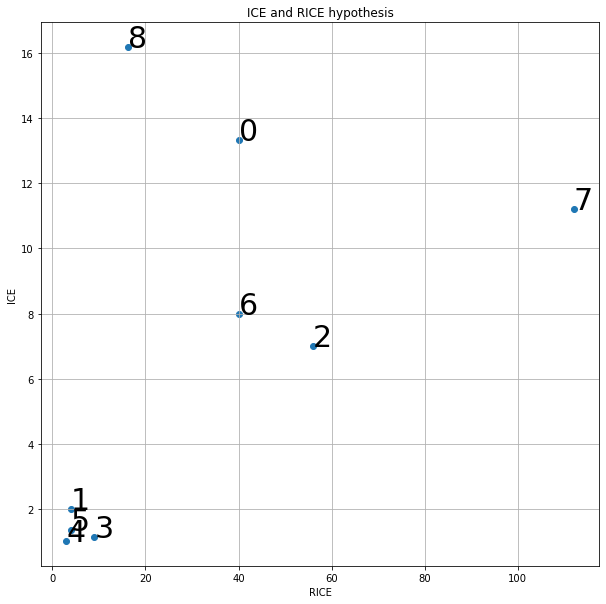

In [123]:
y = data['ICE'] 
z = data['RICE'] 
n = data.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE hypothesis") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()

Thus, based on the results of the two texts, we can say that **the most priority are hypotheses**:
- Add a subscription form to all main pages to build a customer base for email newsletters
- Add blocks of product recommendations to the website of the online store to increase conversion and average check of the order
- Add two new channels to attract traffic, which will attract 30% more users

## A/B test analysis <a id='AB-test'></a>

In [124]:
orders = pd.read_csv('C://Users//chame//Downloads///orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Data types are correct, no gaps found

In [125]:
visitors = pd.read_csv('C://Users//chame//Downloads//visitors.csv', parse_dates = ['date'])
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Data types are also correct, no gaps

Now you need to **check** the data **for duplicates**

In [126]:
visitors.duplicated().sum(), orders.duplicated().sum()

(0, 0)

No duplicates found

In [127]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Only two groups of A/B test

Let's find out the dates of the test, and also make sure that they match in both datasets

In [128]:
orders['date'].min(), orders['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [129]:
visitors['date'].min(), visitors['date'].min()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-01 00:00:00'))

The test was conducted from 01/08/2019 to 31/08/2019, that is, the whole of August 2019

Calculate **number of unique users** for each group

In [130]:
grouped_orders = orders.groupby(by='group', as_index = False).agg({'visitorId':'nunique'})
display(grouped_orders)
f'Доля уникальных клиентов группы A составляет {grouped_orders["visitorId"][0]/grouped_orders["visitorId"].sum() * 100:.1f} процентов от общего количества'

,group,visitorId
0,A,503
1,B,586


'Доля уникальных клиентов группы A составляет 46.2 процентов от общего количества'

Thus, the difference is 3.8%, which is an acceptable level, it is not necessary to delete data

At the same time, the number of visits for each group:

In [131]:
grouped_visits = visitors.groupby(by='group').agg({'visitors':'sum'})
grouped_visits

,visitors
group,
A,18736
B,18916


Now let's see if there are those who fell into two groups at the same time.

In [132]:
amount_of_group = orders.groupby(by = 'visitorId', as_index = False).agg({'group':'nunique'}).sort_values(by ='group', ascending = False)
len(amount_of_group[amount_of_group['group'] == 2])

58

At the same time, 58 users fell into two groups. Let's leave them in the data

So let's summarize:
- There are two test groups
- In group A - 503 unique users (46.2% of the total), in group B - 586 (53.8% of the total)
- 558 users were simultaneously in two groups


***Test dates***: from 01-08-2019 to 31-08-2019

### Analysis of cumulative metrics (revenue, average check and conversion)

#### Analysis of cumulative revenue

In [133]:
# create an array of unique pairs of date values and test groups
datesGroups = orders[['date','group']].drop_duplicates()

# we get aggregated cumulative data on orders by day 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# we get aggregated data cumulative by day about online store visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# we combine cumulative data in one table and assign understandable names to its columns
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))
datesGroups['date'].min(), datesGroups['date'].max()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

The dates are the same as the test dates calculated earlier

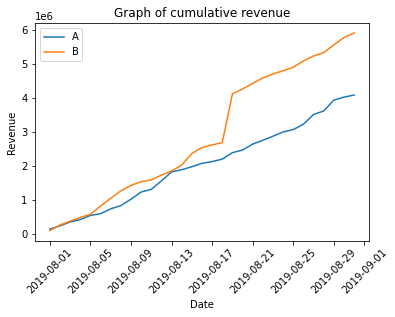

In [134]:
# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# construct a graph of the revenue of group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construct a revenue schedule for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Graph of cumulative revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)  
plt.legend();

Group A's revenue increases more evenly than Group B's revenue. In the second, there was a strong jump around August 18. This may be an indicator of a sharp increase in the number of orders that day, or the appearance of expensive orders.

#### Calculation of the average check

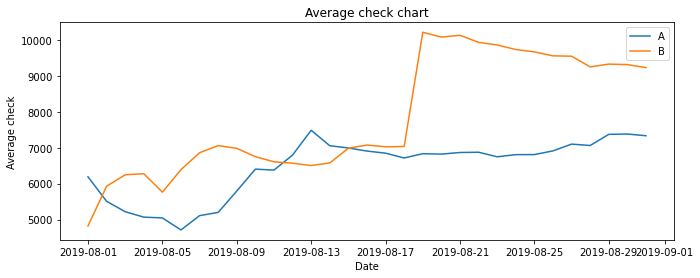

In [135]:
fig = plt.figure()
    
fig.set_figwidth(11)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Average check chart')
plt.xlabel('Date')
plt.ylabel('Average check')
plt.legend();

The average check also becomes uniform towards the end of the test: it settled for group A and continues to fall for group B. It is possible that large orders fell into group B in the first half of the test (a sharp spike on the chart). That is, more data is required to come to the real average check and settle at its level.

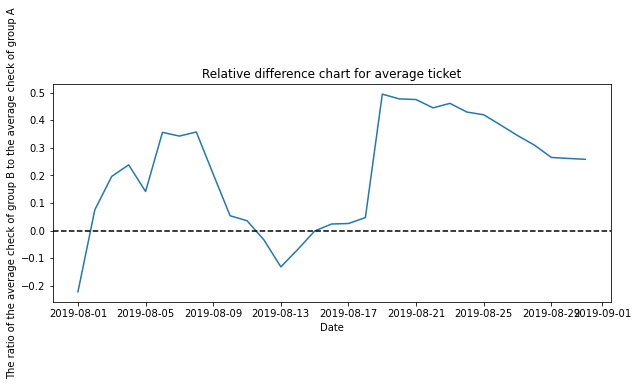

In [136]:
# collect data in one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construct the ratio of average bills
fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Relative difference chart for average ticket')
plt.xlabel('Date')
plt.ylabel('The ratio of the average check of group B to the average check of group A')
# add an axis
plt.axhline(y=0, color='black', linestyle='--');

We see sharp declines and rises, which indicates outliers.

#### Cumulative conversion

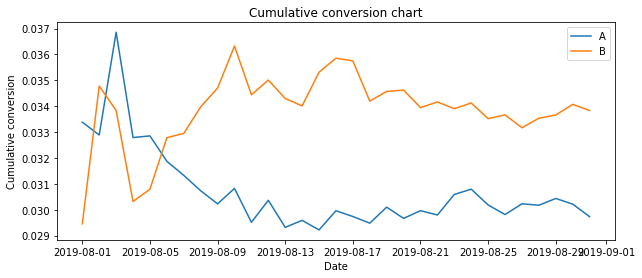

In [137]:
# calculate cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# separate group-A data
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# separate group-B data
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construct graphs
fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative conversion chart')
plt.xlabel('Date')
plt.ylabel('Cumulative conversion')

plt.legend();

Group B converts more than Group A, they look fixed

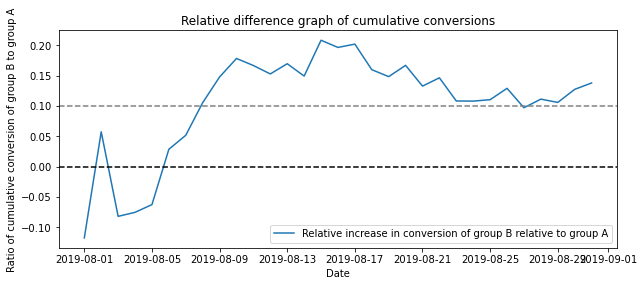

In [138]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative increase in conversion of group B relative to group A")

plt.title('Relative difference graph of cumulative conversions')
plt.xlabel('Date')
plt.ylabel('Ratio of cumulative conversion of group B to group A')

plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');

At first, group B lost a lot to group A. Then the positions changed and the relative increase in conversion became higher in group B, but so far the conversion ratio has not yet been seted up.

### Outlier analysis

First, let's count the number of orders for each user

In [139]:
data = orders.groupby(by = 'visitorId', as_index = False).agg({'transactionId':'nunique'})
data.columns = ['visitorId', 'count']

data.sort_values(by='count',ascending = False).head(10)

,visitorId,count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


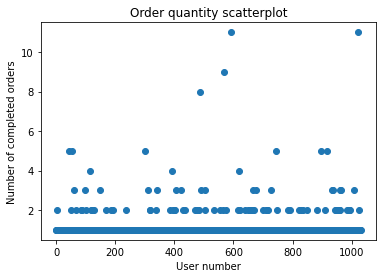

In [140]:
x_values = pd.Series(range(0,len(data['count'])))
plt.title('Order quantity scatterplot')
plt.xlabel('User number')
plt.ylabel('Number of completed orders')
plt.scatter(x_values, data['count']);

From the graph, you can see that in general, people made less than four orders. Mostly two or one. For complete reliability, let's calculate the percentiles.

In [141]:
np.percentile(data['count'], [95,97.5,99])

array([2., 3., 4.])

Thus, no more than 5% of users made more than two purchases, and no more than 1% made four purchases. (no more than 2.5% - 3 purchases). Let's designate our border for anomalous values by the number of orders at the level of 97.5 percentile

In [142]:
order_limit = int(np.percentile(data['count'], [97.5])[0])

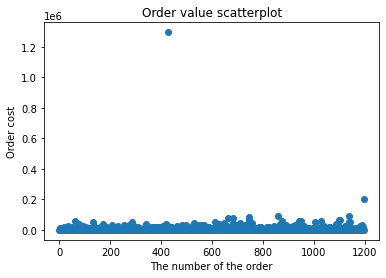

In [143]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Order value scatterplot')
plt.xlabel('The number of the order')
plt.ylabel('Order cost')
plt.scatter(x_values, orders['revenue']);

In [144]:
np.percentile(orders['revenue'], [95, 97.5, 99])

array([28000. , 39530. , 58233.2])

No more than five percent of all orders cost more than 28000 and no more than one percent - 58233.2.

Let us designate the border of anomalous values at the level of the 95th percentile

In [145]:
revenue_limit = int(np.percentile(orders['revenue'], [95])[0])

(0.0, 58234.0)

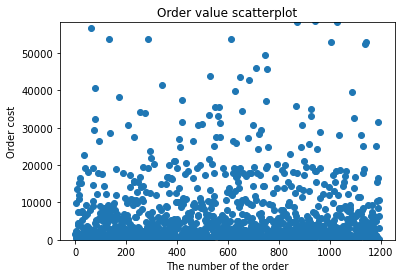

In [146]:
plt.title('Order value scatterplot')
plt.xlabel('The number of the order')
plt.ylabel('Order cost')
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 58234)

**Summarize**: The 95th and 99th percentiles of average bills are 28,000 rubles and 58,233 rubles. And the 95th and 99th percentiles of orders per user are 2 and 4 orders per user

Let's calculate the statistical significance of differences in the average number of orders and the statistical significance of differences in the average order receipt between groups according to "raw" data

Let's formulate hypotheses. Zero: There is no difference in the average number of orders between groups. Alternative: there are differences in the average between groups.

In [147]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

visitorsA = visitors[visitors['group'] == 'A']['visitors'].sum()
visitorsB = visitors[visitors['group'] == 'B']['visitors'].sum()

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: '+ "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Differences in the average number of orders: ' + "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Differences in the average number of orders: 0.138


Conclusion: According to the "raw" data, there are differences in the average number of orders for groups A and B. The first number - p-value = 0.017 is less than 0.05. Hence, we reject the null hypothesis that there are no statistically significant differences in the average number of orders between groups.
The relative gain of group B is 13.8% (second number in the output)

Now let's check the statistical significance of differences in the average check between segments. Null hypothesis: there are no differences in the average check between groups. Alternative hypothesis: there are differences in the average bill between groups.

In [148]:
print('P-value: '+'{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('The difference in the average check: ' +'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.72929
The difference in the average check: 0.259


The p-value is significantly greater than 0.05, which means there is no reason to reject the null hypothesis and believe that there are differences in the average check. The average check of group B is significantly (26%) higher than the average check of group A.

The insignificance of this difference can be explained by the presence of a "spike" - anomalous values in the data of the average check

(*95th and 99th percentiles of average checks are equal to 28,000 rubles and 58,233 rubles. And the 95th and 99th percentiles of the number of orders per user are equal to 2 and 4 orders per user.*)

Let's see how many anomalous users there are. We will assume that these are users who have made more than three orders and orders whose cost is more than 28,000 rubles

In [149]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_limit]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_limit]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
63


There are 63 anomalous users in total. Let's get rid of them

In [150]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Let us again denote the null and alternative hypotheses

*H0*: There is no difference in the average number of orders between groups.

*H1*: There are mean differences between the groups.

In [151]:
print('P-value: '+'{0:5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('The difference in the average number of orders ' +'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.017943
The difference in the average number of orders 0.148


The results for the average number of orders have not changed, the p-value is also below 0.05, that is, the null hypothesis about the absence of statistically significant differences in the average number of orders is rejected. At the same time, the relative gain of group B increased to 14.8%

And the following two hypotheses

*Null hypothesis*: there are no differences in the average check between groups

*Alternative hypothesis*: there are differences in the average check between groups.

In [152]:
print('P-value: '+
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Differences in the average check ' +
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.97653
Differences in the average check -0.017


The p-value is also significantly greater than 0.05, which means there is no reason to reject the null hypothesis and assume that there are differences in the average check.

However, now the average check of group B has approached the average check of group A, even turned out to be 2% lower

### Сonclusion<a id='conclusion'></a>

The highest priority hypotheses based on the results of both methods are the seventh, zero and sixth hypotheses

In the analysis of the results of the A / B test, it was revealed:
- There are statistically significant differences in the average number of orders between groups for both raw and data after filtering out anomalies.;
- There is no statistically significant difference in the average check between the groups, neither according to the "raw" nor according to the data after filtering out anomalies;
- A graph showing the difference in conversion between groups shows that group B performed significantly better than group A.
- The graph of the difference in the average check shows that the results of group B are deteriorating day by day, but are now at about 30%


Thus, it is necessary to stop the test, recognize it as successful and move on to testing the next hypothesis.